<a href="https://colab.research.google.com/github/ksh168/digit-mnist-using-cnn/blob/master/dgit_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

Using TensorFlow backend.


In [2]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()
class_names = ['zero', 'one', 'two', 'three', 'four', 
               'five', 'six', 'seven', 'eight', 'nine']

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
img_width, img_height = 28, 28
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')

In [0]:
x_train=x_train/255
x_test =x_test/255

In [5]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(x_train.shape[1], x_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

W0821 13:00:22.139632 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 13:00:22.193095 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 13:00:22.205571 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 13:00:22.249615 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 13:00:22.273438 139637478643584 deprecation_wrapp

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

W0821 13:00:22.359972 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 13:00:22.405493 139637478643584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 13:00:22.550483 139637478643584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.1521 - acc: 0.9534
Epoch 2/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0530 - acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0407 - acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0311 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0250 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0228 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0190 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0162 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0146 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 12s 197us/step - loss: 

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 81us/step


[0.032458300536652676, 0.9901]

6


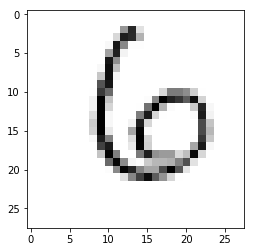

In [8]:
image_index = 100
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

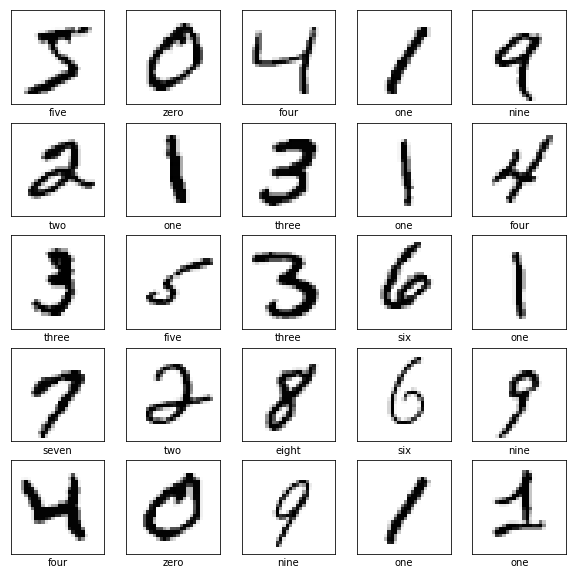

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28),cmap='Greys')
    plt.xlabel(class_names[y_train[i]])
plt.show()

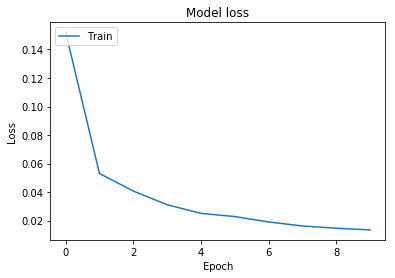

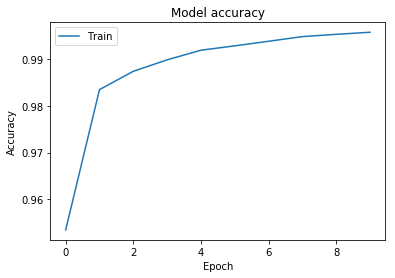

In [10]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(x_train.shape[1], x_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 225us/step - loss: 0.3582 - acc: 0.8848
Epoch 2/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.1337 - acc: 0.9594
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0989 - acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0836 - acc: 0.9751
Epoch 5/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0697 - acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0633 - acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0562 - acc: 0.9824
Epoch 8/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0523 - acc: 0.9844
Epoch 9/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0491 - acc: 0.9844
Epoch 10/10
60000/60000 [==============================] - 13s 220us/step - loss: 

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 85us/step


[0.033884580838825784, 0.9895]

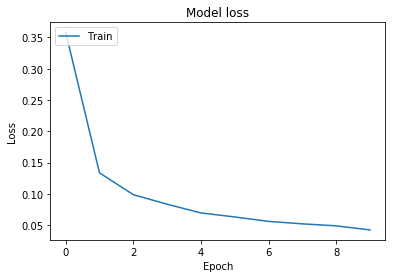

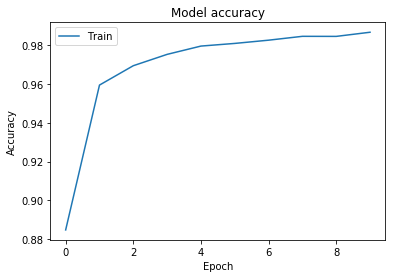

In [14]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2282 - acc: 0.9306
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1010 - acc: 0.9691
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0709 - acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0560 - acc: 0.9820
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0454 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0379 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0316 - acc: 0.9896
Epoch 8/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0305 - acc: 0.9904
Epoch 9/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0250 - acc: 0.9914
Epoch 10/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0226 - a